<div class='alert alert-success'>
    <h1 align="center">Local Search Algorithms: Simulated Annealing for N-Queens</h1> 
    <h3 align="center">Artificial Intelligece Course (Fall 2021)</h3>
    <h5 align="center">Seyed Naser RAZAVI <a href='http://www.snrazavi.ir/ai-slides/'>(website)</a></h5>
</div>

In [1]:
import math
import random
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import clear_output

from utils import timed
from nqueens import NQueensState, NQueensStatePermutation
from nqueens import create_animation, summarize_history

plt.rcParams['figure.figsize'] = (6, 6)

## N-Queens Problem
- **Goal**: Place N queens on a N-by-N chess board so that no two queens can attack each other.
- Thus a solution requires that no two queens share the same row, column or diagonal.

<p align="center">
    <img src="imgs/Four-Queens-Local-Search.png" width="80%">
</p>
<h6 align="center">4-Queens problem</h6>

### Problem formulation: First formulation
- **States**: each column contains only one queen.
- **Actions**: move a queen to another row in its column.
- **State Space Size**: $N^N$


### Problem formulation: Second formulation (Permuatation)
- **States**: each column and each row contains only one queen.
- **Actions**: move a queen to another row in its column which is not occupied.
- **State Space Size**: $N!$

In [2]:
state = NQueensState.random_state(N=8)
print(state)

[3, 3, 1, 5, 1, 7, 1, 7] <9>


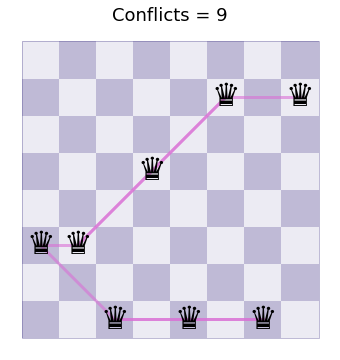

In [3]:
state.plot(show_conflicts=True)

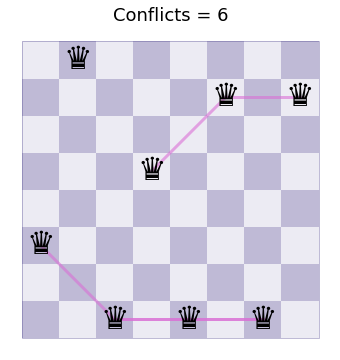

In [4]:
best_neighbor = state.best_neighbor()
best_neighbor.plot(show_conflicts=True)

In [5]:
best_neighbor

NQueensState(queens=[3, 8, 1, 5, 1, 7, 1, 7])

## Simulated Annealing
<img src="imgs/simulated_annealing.png" width="80%">

In [6]:
class SimulatedAnnealing:
    def __init__(self):
        self.history = []
        self.T = None
    
    def search(self, state, T0=10, alpha=0.99, tol=1e-8, verbose=0):
        self.T = T0
        current = state

        while True:

            clear_output(wait=True)
            if verbose == 0: print(f'T = {self.T:.8f}, Conflicts = {current.conflicts():d}')
            elif verbose == 1: print(current)
            elif verbose == 2: current.plot(show_conflicts=False)
            elif verbose == 3: current.plot(show_conflicts=True)
            
            self.history.append(current)

            if self.T < tol or current.conflicts() == 0:
                return current

            neighbor = current.random_neighbor()
            delta_E = current.conflicts() - neighbor.conflicts()
            if delta_E >= 0: 
                current = neighbor
            elif random.random() < math.exp(delta_E / self.T):
                current = neighbor

            self.T = alpha * self.T

        return current
    
    def __call__(self, state, T0=10, alpha=0.99, tol=1e-8, verbose=0):
        return self.search(state, T0, alpha, tol, verbose)
    

    def plot_history(self):
        plt.figure(figsize=(12, 4))

        conflicts = [state.conflicts() for state in self.history]
        plt.plot(range(len(conflicts)), conflicts)
        plt.xlabel('Iteration')
        plt.ylabel('Conflicts')
        plt.show()

In [7]:
initial_state = NQueensState.random_state(100)

sa = SimulatedAnnealing()
t, solution = timed(sa, state=initial_state, T0=10, alpha=.999, verbose=0)
print(f'\n\n<Solution with {solution.conflicts()} conflicts found in {t:.2f} secs.>\n {solution}')

T = 0.00000001, Conflicts = 3


<Solution with 3 conflicts found in 34.22 secs.>
 [1, 92, 71, 35, 59, 72, 24, 55, 29, 37, 8, 57, 7, 46, 61, 79, 67, 34, 83, 45, 2, 5, 80, 82, 99, 87, 65, 31, 100, 28, 26, 73, 76, 53, 19, 49, 33, 89, 9, 93, 32, 51, 48, 68, 66, 4, 21, 97, 91, 17, 11, 23, 29, 27, 81, 15, 75, 70, 95, 6, 18, 54, 56, 94, 18, 14, 90, 78, 30, 47, 39, 16, 25, 12, 60, 98, 85, 44, 86, 69, 96, 36, 38, 20, 63, 3, 52, 50, 77, 10, 40, 22, 62, 13, 42, 47, 84, 43, 74, 64] <3>


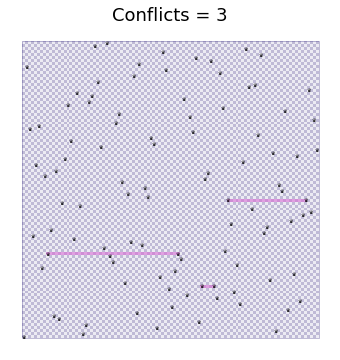

In [8]:
solution.plot(width=1024, height=1024, show_conflicts=True)

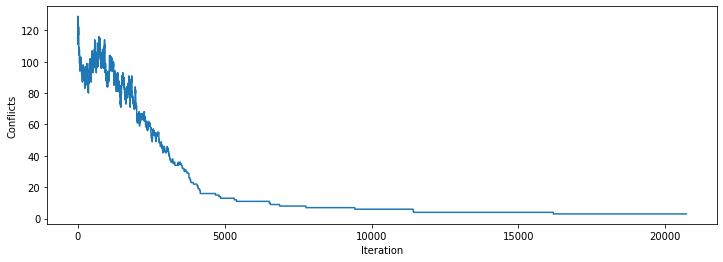

In [9]:
sa.plot_history()

In [10]:
def update_plot(i, show_conflicts):
    state = sa.history[i - 1]
    state.plot(width=1024, height=1024, show_conflicts=show_conflicts)

In [11]:
i = widgets.IntSlider(value=1, min=1, max=len(sa.history), description='i:')
show_conflicts = widgets.Checkbox(value=True, description='Show conflicts')

widgets.interact(update_plot, i=i, show_conflicts=show_conflicts);

interactive(children=(IntSlider(value=1, description='i:', max=20714, min=1), Checkbox(value=True, description…

## Permutation

In [12]:
initial_state = NQueensStatePermutation.random_state(100)

sa = SimulatedAnnealing()
t, solution = timed(sa, state=initial_state, T0=10, alpha=.999, verbose=0)
print(f'\n\n<Solution with {solution.conflicts()} conflicts found in {t:.2f} secs.>\n {solution}')

T = 0.00008808, Conflicts = 1


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



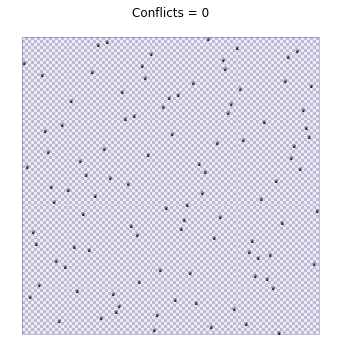

In [13]:
solution.plot(width=1024, height=1024, show_conflicts=True)

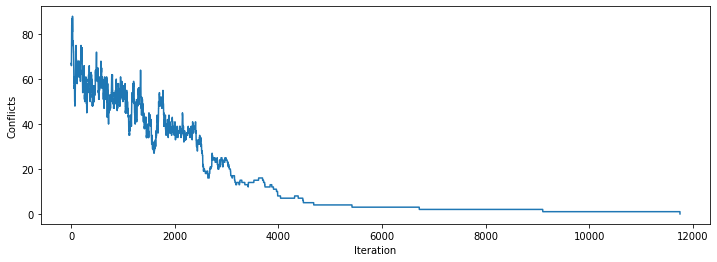

In [14]:
sa.plot_history()

In [15]:
i = widgets.IntSlider(value=1, min=1, max=len(sa.history), description='i:')
show_conflicts = widgets.Checkbox(value=True, description='Show conflicts')

widgets.interact(update_plot, i=i, show_conflicts=show_conflicts);

interactive(children=(IntSlider(value=1, description='i:', max=11753, min=1), Checkbox(value=True, description…

## Animation

In [17]:
N = 10
initial_state = NQueensState.random_state(N)

sa = SimulatedAnnealing()
t, solution = timed(sa, state=initial_state, T0=10, alpha=.98, verbose=0)
print(f'\n\n<Solution with {solution.conflicts()} conflicts found in {t:.2f} secs.>\n {solution}')

T = 0.00000004, Conflicts = 0


<Solution with 0 conflicts found in 0.65 secs.>
 [4, 7, 3, 6, 2, 10, 1, 9, 5, 8] <0>


In [18]:
len(sa.history)

955

In [19]:
history = summarize_history(sa.history)
print(len(history))

146


In [20]:
anim = create_animation(history, figsize=(6, 6))
anim.save(f'imgs/{N}-queens-sa.gif', writer='imagemagick')
clear_output()

<img src="imgs/10-queens-sa.gif" width="50%">

In [21]:
anim = create_animation(history, figsize=(12, 4), plot_objective=True)
anim.save(f'imgs/{N}-queens-sa-with-objective.gif', writer='imagemagick')
clear_output()

<img src="imgs/10-queens-sa-with-objective.gif">